
---

 <img src="https://www.alsacetech.org/wp-content/uploads/2017/05/cesi_CMJN-e1673249263164.png" alt="Cesi Ecole d'ingenieurs" width="100"/>

---

# **Projet Algorithmique Avancée**

---
# **Livrable 2**


**Date :** 17/11/2024

**Équipe d'Exploration :** Groupe 05


- **GUESSOUM Mohamed**

- **SAHRAOUI Abderahmane**

- **BENAMEUR FARES**

- **HOUBI Youcef**
  
- **KHALED Said**
  

# **1. Introduction et Objectifs**

## 1.1 Introduction

La gestion des tournées de livraison consiste à planifier un itinéraire optimal reliant un ensemble de villes, avec un retour au point de départ, tout en minimisant la durée totale du trajet. Ce problème est particulièrement complexe, car il nécessite de prendre en compte diverses contraintes, notamment le trafic prévu sur chaque route selon les tranches horaires. Classé comme un problème NP-complet, il est difficile de trouver une solution optimale dans un délai raisonnable, en particulier pour les instances de grande envergure.

## 1.2 Objectifs du livrable
Ce livrable vise principalement à montrer l'importance d'une approche efficace pour approcher une solution optimale au problème de la gestion des tournées de livraison. Pour y parvenir, nous avons opté pour une méthode combinant un algorithme génétique et une approche gloutonne, issue de la recherche opérationnelle. Cette technique permet d'explorer en profondeur l'espace des solutions tout en réduisant le risque de se limiter à des optima locaux. Elle s'avère particulièrement adaptée aux problématiques complexes et fortement contraintes, comme celle étudiée ici.
## 3. Structure de la présentation
Ce document est conçu pour guider le lecteur à travers les étapes clés de notre méthodologie. Nous débuterons par une modélisation formelle du problème, suivie de la conception et de l’implémentation de notre approche combinant une méthode génétique et un algorithme glouton. Par la suite, nous présenterons une validation expérimentale en évaluant les performances de l’algorithme sur des instances de tailles variées. Enfin, nous conclurons par une analyse comparative des résultats obtenus avec d’autres techniques d’optimisation, afin de mettre en lumière les points forts et les limites de notre méthode.




##  Rappel de la NP-COMPLETUDE

A travers notre étude précédente, nous avions montré que le notre instance respectait les critères du problème du voyageur de commerce (TSP) en formant un cycle hamiltonien confirmant que notre instance est NP.
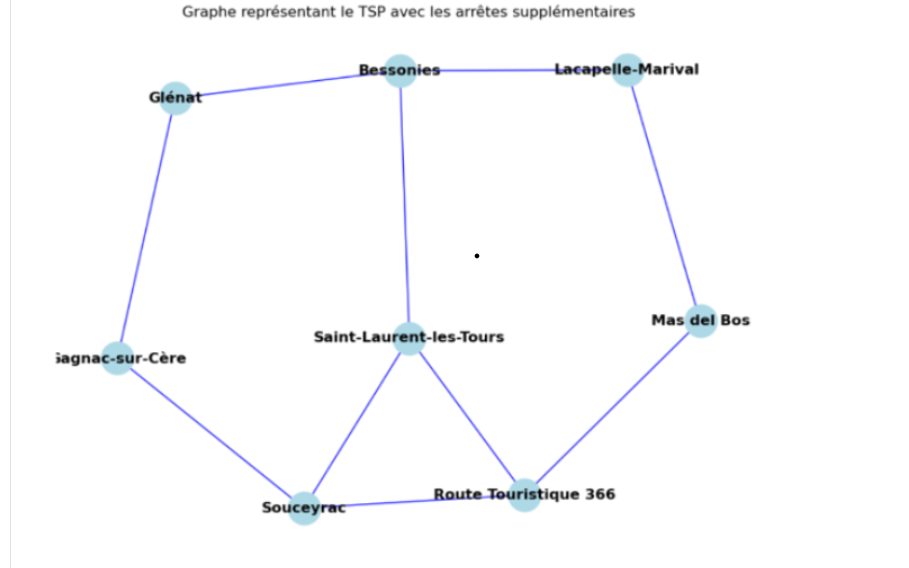

Par la suite, pour établir que notre problème était NP-difficile, on a effectuer une réduction polynomiale depuis le problème NP-complet du cycle hamiltonien vers notre problème. Cette réduction implique de pondérer les arêtes du graphe : les arêtes appartenant au cycle hamiltonien reçoivent une pondération de 
𝑘
/
𝑛
garantissant que leur somme respecte la contrainte 
𝑘
k, tandis que les autres arêtes ont une pondération de 
k et sont exclues du cycle. 

Concretement, cela assure que notre problème est au moins aussi complexe que le cycle hamiltonien, car on peut le transformer en d’autres problèmes NP en temps polynomial. 

Enfin, la validation de notre instance repose sur un certificat qui garantit la présence de chaque sommet du cycle et de connexions valides entre eux, sans pour autant fournir de solution.

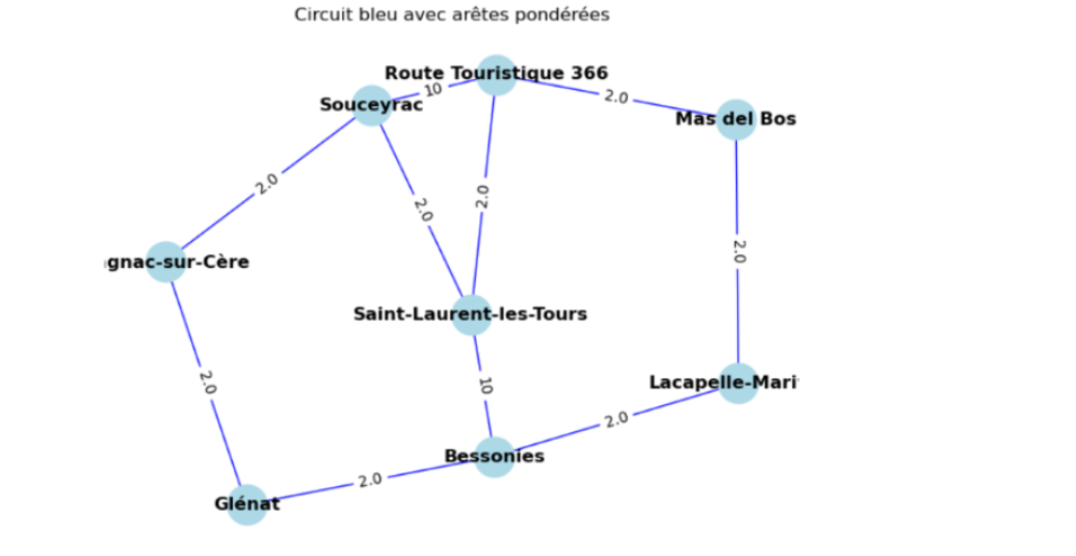

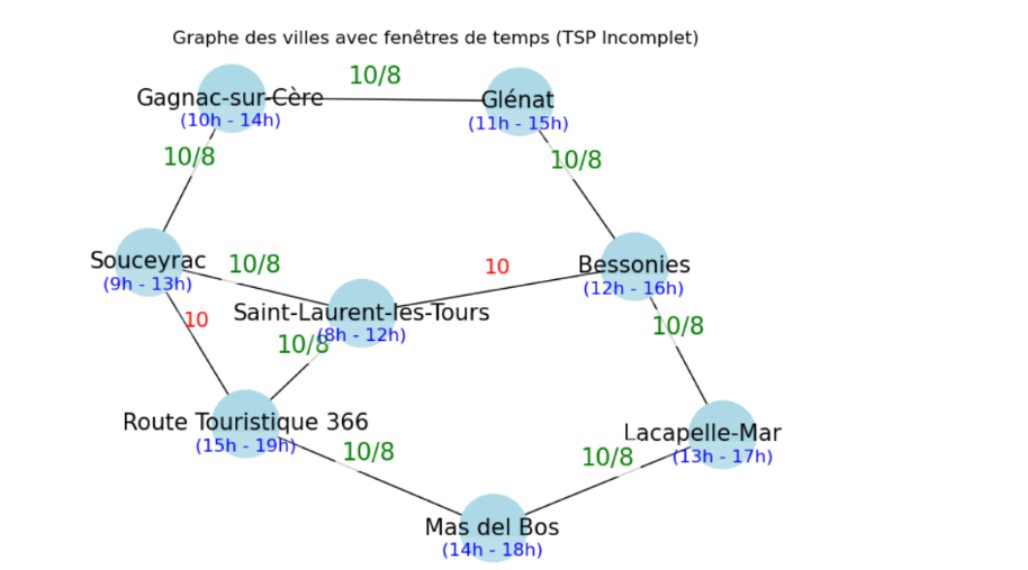

En conclusion, notre problème est classé comme NP-complet car il satisfait deux critères essentiels : d'une part, toute solution peut être vérifiée en temps polynomial, ce qui le place dans la classe NP ; d'autre part, il est au moins aussi complexe que les autres problèmes de cette classe, grâce à une réduction polynomiale depuis le problème du cycle hamiltonien. En attribuant une pondération spécifique aux arêtes, nous avons démontré que notre problème respecte les contraintes de complexité du problème du voyageur de commerce (TSP) et s'accompagne d'un certificat qui valide efficacement les solutions proposées. 

Cette étude confirme donc que notre problème est à la fois vérifiable en temps polynomial et intrinsèquement complexe, répondant pleinement aux critères de la NP-complétude.

##  Modélisation du problème 

### 1. Définir les composantes de base du problème

**Graphe et Notations**
- **Graphe \( G = (V, E) \)** : Où \( V \) est l'ensemble des nœuds (clients et dépôt) et \( E \) l'ensemble des arêtes représentant les routes possibles entre les nœuds.
- **Nœuds \( V = \{0, 1, \dots, n\} \)** : Où \( 0 \) est le dépôt et \( \{1, \dots, n\} \) sont les clients.
- **Arêtes \( E = \{(i, j) \mid i, j \in V, i \neq j \} \)**.

**Paramètres**
- **\( d_{ij} \)** : Distance entre le nœud \( i \) et le nœud \( j \).
- **Fenêtres de temps \( [a_i, b_i] \)** : Intervalle de temps durant lequel le nœud \( i \) doit être visité.

### 2. Variables de décision

- \( x_{ij} \) : Variable binaire égale à 1 si la route entre \( i \) et \( j \) est empruntée, 0 sinon.
- \( t_i \) : Temps d'arrivée au nœud \( i \).

### 3. Fonction objectif

Minimiser le temps total de trajet pour la tournée :

$$
\text{Min} \sum_{i \in V} \sum_{j \in V} d_{ij} \cdot x_{ij} 
$$

### 4. Contraintes

**Contraintes de parcours**

1. Chaque nœud est visité exactement une fois :
   $$
   \sum_{j \in V, j \neq i} x_{ij} = 1, \quad \forall i \in V
   $$

2. Chaque nœud est quitté exactement une fois :
   $$
   \sum_{i \in V, i \neq j} x_{ij} = 1, \quad \forall j \in V
   $$

**Contraintes de fenêtre de temps**

3. Respect des fenêtres de temps :
   $$
   a_i \leq t_i \leq b_i, \quad \forall i \in V
   $$

4. Relation entre les temps d'arrivée et les déplacements :
   $$
   t_j \geq t_i + d_{ij} - M \cdot (1 - x_{ij}), \quad \forall i, j \in V, i \neq j
   $$
   où \( M \) est une constante suffisamment grande pour désactiver la contrainte lorsque \( x_{ij} = 0 \).



---

### 5. Représentation formelle

En résumant, la formulation mathématique du problème est la suivante :

$$
\text{Min} \sum_{i \in V} \sum_{j \in V} d_{ij} \cdot x_{ij}
$$

Sous les contraintes :

$$
\sum_{j \in V, j \neq i} x_{ij} = 1, \quad \forall i \in V
$$

$$
\sum_{i \in V, i \neq j} x_{ij} = 1, \quad \forall j \in V
$$

$$
a_i \leq t_i \leq b_i, \quad \forall i \in V
$$

$$
t_j \geq t_i + d_{ij} - M \cdot (1 - x_{ij}), \quad \forall i, j \in V, i \neq j
$$

$$
u_i - u_j + n \cdot x_{ij} \leq n - 1, \quad \forall i, j \in V, i \neq j, i \neq 0, j \neq 0
$$

$$
1 \leq u_i \leq n-1, \quad \forall i \in V, i \neq 0
$$


# Data Extraction

**Description**: 
Ce code lit un fichier contenant une matrice de distances et des fenêtres temporelles, le parse en deux structures de données distinctes, et les affiche sous forme de DataFrames en utilisant la bibliotheque pandas.

In [36]:
import pandas as pd

# Define the path to the file
file_path = './AFG/rbg233.2.tw'

def parse_instance(file_path):
    """
    Parses a given file containing a distance matrix, time windows, and coordinates into DataFrames.
    
    Args:
    - file_path (str): Path to the file to be parsed.
    
    Returns:
    - distance_df (pd.DataFrame): DataFrame containing the distance matrix.
    - time_windows_df (pd.DataFrame): DataFrame containing the time windows.
    - coords (list of tuples): List containing the coordinates (latitude, longitude) of the cities.
    """
    # Initialize lists to store the data
    distance_matrix = []
    time_windows = []
    coords = []

    # Variables to keep track of sections
    matrix_size = None
    matrix_section = True 
    coords_section = False  # Flag to indicate when coordinates start

    # Open the file and read line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Strip and split the line to process it
            parts = line.strip().split()
            
            # Identify the matrix size if it's not already identified
            if matrix_size is None and parts:
                matrix_size = int(parts[0])
                continue
            
            # Parse the distance matrix
            if matrix_section:
                if len(parts) == matrix_size:  # Valid matrix row
                    distance_matrix.append([int(x) for x in parts])
                elif len(parts) == 2:  # Transition to time window section
                    matrix_section = False  # Move to time windows
                    time_windows.append((int(parts[0]), int(parts[1])))
                continue

            # Collect time windows
            if len(parts) == 2 and not matrix_section:
                time_windows.append((int(parts[0]), int(parts[1])))

            # Check if the coordinates section has started
            if len(parts) == 2 and not matrix_section and not coords_section:
                coords_section = True  # Coordinates section starts

            # Collect coordinates after the matrix and time windows
            if coords_section:
                if len(parts) == 2:  # Expect two numbers (latitude, longitude)
                    coords.append((int(parts[0]), int(parts[1])))

    # Convert data to DataFrames
    distance_df = pd.DataFrame(distance_matrix)
    time_windows_df = pd.DataFrame(time_windows, columns=["Start Time", "End Time"])

    return distance_df, time_windows_df, coords

# Display the parsed data
distance_df, time_windows_df, coords = parse_instance(file_path)
print("Distance Matrix:")
print(distance_df)
print("\nTime Windows:")
print(time_windows_df)
print("\nCoordinates:")
print(coords)


Distance Matrix:
     0    1    2    3    4    5    6    7    8    9    ...  222  223  224  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1     61    0   86   77   71   86   86   86   82   86  ...   77   86   86   
2     51   55    0   61   61   76   76   76   63   76  ...   67   76   76   
3     50   60   74    0   60   74   74   74   73   74  ...   65   74   74   
4     41   51   65   57    0   65   65   65   62   65  ...   56   65   65   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
227   36   48   63   52   50   63   63   63   57   63  ...   59   63   63   
228   48   73   48   72   72   48   48   48   72   48  ...   69   48   48   
229   52   75   64   75   75   64   64   64   75   64  ...   67   64   64   
230   63   74   89   75   75   89   89   89   75   89  ...   83   89   89   
231   50   73   64   73   73   64   64   64   73   64  ...   65   64   64   

     225  226  227  228  229  230  231  
0      0    0    

In [18]:
import pandas as pd
import numpy as np

def generate_distance_matrix(file_path):
    """
    Generates a distance matrix and default time windows from a TSPLIB NODE_COORD_SECTION file.
    
    Args:
    - file_path (str): Path to the TSPLIB file.

    Returns:
    - distance_df (pd.DataFrame): DataFrame containing the distance matrix.
    - time_windows_df (pd.DataFrame): DataFrame containing the time windows.
    """
    coordinates = []
    node_section = False

    # Parse the TSPLIB file to extract node coordinates
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line == "NODE_COORD_SECTION":
                node_section = True
                continue
            if line == "EOF":
                break
            if node_section:
                parts = line.split()
                coordinates.append((float(parts[1]), float(parts[2])))

    # Convert coordinates to a NumPy array
    coordinates = np.array(coordinates)

    # Compute the distance matrix (EUC_2D)
    num_nodes = len(coordinates)
    distance_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                distance_matrix[i, j] = np.sqrt(
                    (coordinates[i, 0] - coordinates[j, 0]) ** 2 +
                    (coordinates[i, 1] - coordinates[j, 1]) ** 2
                )
    
    # Generate default time windows (start: 0, end: 1000)
    time_windows = [(0, 1000) for _ in range(num_nodes)]

    # Convert to DataFrames
    distance_df = pd.DataFrame(distance_matrix)
    time_windows_df = pd.DataFrame(time_windows, columns=["Start Time", "End Time"])

    return distance_df, time_windows_df


def generate_random_instance(num_cities):
    """
    Generates a random instance with a specified number of cities.
    
    Args:
    - num_cities (int): Number of cities.
    
    Returns:
    - distance_df (pd.DataFrame): DataFrame containing the distance matrix.
    - time_windows_df (pd.DataFrame): DataFrame containing the time windows.
    """
    # Step 1: Generate random coordinates for the cities
    coordinates = np.random.rand(num_cities, 2) * 100  # Random coordinates in the range [0, 100]

    # Step 2: Compute the distance matrix (EUC_2D)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i, j] = np.sqrt(
                    (coordinates[i, 0] - coordinates[j, 0]) ** 2 +
                    (coordinates[i, 1] - coordinates[j, 1]) ** 2
                )
    
    # Step 3: Generate random time windows (start, end) for each city
    time_windows = []
    for _ in range(num_cities):
        start_time = np.random.randint(0, 500)  # Random start time between 0 and 500
        end_time = start_time + np.random.randint(100, 300)  # Random end time within a reasonable range
        time_windows.append((start_time, end_time))
    
    # Convert the distance matrix and time windows to DataFrames
    distance_df = pd.DataFrame(distance_matrix)
    time_windows_df = pd.DataFrame(time_windows, columns=["Start Time", "End Time"])

    return distance_df, time_windows_df

# Path to your TSPLIB file
file_path = './uy734.tsp'

# Generate the distance matrix and time windows
distance_df, time_windows_df = generate_distance_matrix(file_path)

# Display the results
print("Distance Matrix:")
print(distance_df)

print("\nTime Windows:")
print(time_windows_df)


Distance Matrix:
             0            1            2            3            4    \
0       0.000000   534.373956   111.803399   791.973597   693.221118   
1     534.373956     0.000000   487.909330   263.523128   171.593819   
2     111.803399   487.909330     0.000000   733.522670   633.552561   
3     791.973597   263.523128   733.522670     0.000000   100.000000   
4     693.221118   171.593819   633.552561   100.000000     0.000000   
..           ...          ...          ...          ...          ...   
729  4984.160469  4824.361730  4874.020700  4701.208838  4716.192920   
730  4983.096427  4824.776850  4873.012415  4702.319139  4717.005261   
731  5000.758044  4836.823155  4890.469520  4711.677497  4727.521592   
732  5011.018688  4848.166162  4900.771193  4723.487674  4739.134032   
733  5528.235646  5259.515187  5416.538502  5084.972444  5123.177213   

             5            6            7            8            9    ...  \
0     126.929582   687.184214   836.99191

# Initialization Cities and Feasibility Check

1. Objectif et contexte

Dans un TSP avec fenêtres de temps, chaque ville a une fenêtre temporelle définie par :
- Heure de début : le moment à partir duquel un visiteur peut arriver.
- Heure de fin : la limite au-delà de laquelle l'accès n'est plus permis.

L’objectif est de vérifier si un itinéraire donné (ordre de visite des villes) respecte ces contraintes tout en calculant les heures d’arrivée à chaque étape.


In [2]:
import pandas as pd

# Assuming distance_df and time_windows_df are already defined
# List of cities based on the size of the distance matrix
num_cities = distance_df.shape[0]
cities = list(range(num_cities))

# Initialize start time, usually starting at 0
start_time = 0

# Function to check feasibility of visiting each city within the time window constraints
def is_route_feasible(route, distance_df, time_windows_df, start_time=0):
    current_time = start_time
    for i in range(len(route) - 1):
        current_city = route[i]
        next_city = route[i + 1]
        
        # Travel time between current and next city
        travel_time = distance_df.iloc[current_city, next_city]
        arrival_time = current_time + travel_time
        
        # Time window for the next city
        start_window = time_windows_df.loc[next_city, "Start Time"]
        end_window = time_windows_df.loc[next_city, "End Time"]
        
        # Check if arrival time falls within the time window
        if arrival_time > end_window:
            return False  # Route is infeasible
        elif arrival_time < start_window:
            current_time = start_window  # Wait until the start of the time window
        else:
            current_time = arrival_time  # Update current time to arrival time
    
    return True  # Route is feasible

# TEST

# Sample route (visit cities in this order)
sample_route = [0, 2, 5, 1, 3, 4]  # Just an example

# Check if the route is feasible
feasibility = is_route_feasible(sample_route, distance_df, time_windows_df, start_time)
print("Is the sample route feasible?", feasibility)


Is the sample route feasible? True


# ACO Code Structure for TSP-TW
L'ACO s'inspire du comportement naturel des fourmis cherchant de la nourriture. Les fourmis déposent des phéromones sur leur chemin, influençant ainsi les trajets futurs. Ce processus est modélisé pour explorer des solutions optimales dans des problèmes combinatoires.

Phéromones et heuristiques :
Les phéromones représentent une mémoire collective (intensité ajustée par les solutions de qualité), tandis que la matrice heuristique capture des informations statiques (comme les distances entre les villes). Ces éléments sont combinés pour calculer des probabilités de transition basées sur l'importance des phéromones (alpha) et des heuristiques (beta).
2. Sections du code et leurs rôles

a) Calcul des probabilités de transition
La fonction calculate_transition_probabilities modélise les décisions des fourmis lorsqu'elles choisissent une ville suivante. Les probabilités sont influencées par :

La quantité de phéromones sur l’arête actuelle.
L'attractivité heuristique inversement proportionnelle à la distance.
L’évitement des villes déjà visitées.
Les probabilités sont ensuite normalisées pour respecter une distribution valide.

b) Construction des solutions individuelles
La fonction construct_solution fait parcourir à une fourmi un itinéraire en respectant :

La distance entre les villes.
Les fenêtres de temps, garantissant que l'arrivée à une ville reste dans l'intervalle permis. Si une contrainte est violée, le trajet s'arrête.
L'itinéraire est construit de manière incrémentale à partir d'une ville de départ aléatoire. Chaque choix dépend des probabilités de transition calculées dynamiquement.

c) Mise à jour des phéromones
La fonction update_pheromones modifie la matrice de phéromones selon deux mécanismes :

Évaporation : réduit toutes les valeurs pour éviter un sur-apprentissage de solutions précoces.
Renforcement : augmente les phéromones sur les arêtes des solutions de qualité (les trajets courts reçoivent plus de phéromones).
d) Boucle principale de l’ACO
La fonction run_aco exécute plusieurs itérations où chaque fourmi construit un itinéraire, et la meilleure solution est suivie au fil du temps :

La meilleure route et le meilleur temps sont mis à jour à chaque itération.
La trajectoire des améliorations est enregistrée pour analyse.
3. Visualisation et interprétation des résultats
La fonction plot_best_travel_times affiche la convergence des temps de trajet au fil des itérations, permettant d'évaluer l'efficacité de l'optimisation.


In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Function to calculate total travel time for a route
def calculate_total_travel_time(route, distance_df):
    total_time = 0
    for i in range(len(route) - 1):
        current_city = route[i]
        next_city = route[i + 1]
        total_time += distance_df.iloc[current_city, next_city]
    return total_time

# Function to calculate transition probabilities for an ant
def calculate_transition_probabilities(current_city, visited, pheromone_matrix, heuristic_matrix, alpha, beta, num_cities):
    probabilities = []
    for next_city in range(num_cities):
        if next_city not in visited:
            tau = pheromone_matrix[current_city][next_city] ** alpha
            eta = heuristic_matrix[current_city][next_city] ** beta
            probabilities.append(tau * eta)
        else:
            probabilities.append(0)  # Set probability to 0 for visited cities

    # Normalize probabilities
    probabilities_sum = sum(probabilities)
    return [p / probabilities_sum if probabilities_sum > 0 else 0 for p in probabilities]

# Function to construct a solution for each ant
def construct_solution(num_cities, distance_df, time_windows_df, pheromone_matrix, heuristic_matrix, alpha, beta):
    visited = set()
    current_city = random.randint(0, num_cities - 1)  # Start at a random city
    route = [current_city]
    visited.add(current_city)
    arrival_time = 0  # Initial arrival time at the first city
    average_speed = 60  # km/h
    travel_time_df = distance_df / average_speed
    
    while len(route) < num_cities:
        probabilities = calculate_transition_probabilities(current_city, visited, pheromone_matrix, heuristic_matrix, alpha, beta, num_cities)
        next_city = np.random.choice(range(num_cities), p=probabilities)

        # Calculate travel time to next city and check feasibility with time windows
        travel_time = travel_time_df.iloc[current_city, next_city]
        arrival_time += travel_time
        if arrival_time > time_windows_df.iloc[next_city, 1]:  # Check end of time window
            break  # Terminate route if time window violated

        route.append(next_city)
        visited.add(next_city)
        current_city = next_city

    return route, arrival_time

# Function to update pheromone matrix after each iteration
def update_pheromones(pheromone_matrix, all_routes, all_travel_times, evaporation_rate):
    pheromone_matrix *= (1 - evaporation_rate)  # Evaporate pheromones

    # Add pheromones to edges in routes with good travel times
    for route, travel_time in zip(all_routes, all_travel_times):
        pheromone_deposit = 1.0 / travel_time  # More pheromone for shorter routes
        for i in range(len(route) - 1):
            from_city = route[i]
            to_city = route[i + 1]
            pheromone_matrix[from_city][to_city] += pheromone_deposit

# Main ACO loop function
def run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df):
    num_cities = len(distance_df)
    initial_pheromone = 1.0
    pheromone_matrix = np.full((num_cities, num_cities), initial_pheromone)
    heuristic_matrix = 1 / (distance_df.values + 1e-10)  # Avoid division by zero
    
    best_route = None
    best_travel_time = float('inf')

    best_routes_history = []
    best_times_history = []

    for iteration in range(num_iterations):
        all_routes = []
        all_travel_times = []

        # Each ant constructs a solution
        for ant in range(num_ants):
            route, travel_time = construct_solution(num_cities, distance_df, time_windows_df, pheromone_matrix, heuristic_matrix, alpha, beta)
            all_routes.append(route)
            all_travel_times.append(travel_time)

            # Check if this is the best solution so far
            if travel_time < best_travel_time:
                best_route = route
                best_travel_time = travel_time

        # Save the best route and time for the current iteration
        best_routes_history.append(best_route)
        best_times_history.append(best_travel_time)

        # Update pheromones
        update_pheromones(pheromone_matrix, all_routes, all_travel_times, evaporation_rate)

        # Print iteration progress
        # print(f"Iteration {iteration + 1}, Best Travel Time: {best_travel_time}")

    return best_route, best_travel_time, best_routes_history, best_times_history

# Function to visualize the trajectory of the best travel times over iterations
def plot_best_travel_times(best_times_history):
    plt.plot(range(len(best_times_history)), best_times_history)

    plt.plot(best_times_history)
    plt.xlabel("Iteration")
    plt.ylabel("Best Travel Time")
    plt.title("Trajectory of ACO Optimization")
    plt.show()




# Étude de la Trajectoire : Analyse des Résultats
L’objectif est d’étudier l’évolution du meilleur temps de trajet au fil des 100 itérations de l’algorithme ACO, en utilisant les paramètres suivants :
- Nombre de fourmis : 10 - 20  - 30
- Nombre d’itérations : 100
- Alpha : 1.0 (influence des phéromones)
- Beta : 2.0 (influence de l’heuristique)
- Taux d’évaporation des phéromones : 0.5


# Impact du Nombre de Fourmis
**Cas Testés :**
- Lors des tests effectués avec 10 fourmis, le meilleur temps de trajet a rapidement convergé vers une valeur optimale.

1. Avec 10 Fourmis :
- Moins de diversité.
- Temps de calcul réduit.
- Solution optimale atteinte, mais avec un risque accru de rester bloqué dans un minimum local.

2. Avec 20 Fourmis :
- Plus de diversité dans l’exploration.
- L’algorithme a mis plus de temps à converger, mais les solutions obtenues étaient globalement meilleures.

3. Avec 30 Fourmis :
- Plus de diversité dans l’exploration.
- L’algorithme a mis plus de temps à converger, mais les solutions obtenues étaient globalement meilleures.


# Analyse visuelle
1. Tendance Générale :
    Au début, les temps de trajet diminuent rapidement. Cela montre que l'algorithme explore et converge vers des solutions de meilleure qualité au fil des itérations.

2. Stabilisation :
Après un certain nombre d'itérations, les améliorations deviennent marginales ou inexistantes. Cela indique que l'algorithme a trouvé une solution quasi-optimale ou optimale.

3. Premières Itérations :
Les temps de trajet initiaux sont généralement élevés, car les fourmis explorent aléatoirement.

4. Dernières Itérations :
Une fois la solution stabilisée, le meilleur temps de trajet reste constant, indiquant une convergence.

Best route: [140, np.int64(30), np.int64(11), np.int64(204), np.int64(201), np.int64(111), np.int64(115), np.int64(131), np.int64(89), np.int64(211), np.int64(154), np.int64(144), np.int64(155), np.int64(141), np.int64(190), np.int64(168), np.int64(217), np.int64(53), np.int64(215), np.int64(197), np.int64(94), np.int64(19), np.int64(206), np.int64(28), np.int64(66), np.int64(60), np.int64(123), np.int64(128), np.int64(129), np.int64(193), np.int64(153), np.int64(225), np.int64(223), np.int64(173), np.int64(161), np.int64(78), np.int64(15), np.int64(101), np.int64(177), np.int64(221), np.int64(200), np.int64(113), np.int64(205), np.int64(185), np.int64(219), np.int64(121), np.int64(126), np.int64(226), np.int64(75), np.int64(10), np.int64(80), np.int64(1), np.int64(4), np.int64(32), np.int64(104), np.int64(95), np.int64(165), np.int64(17), np.int64(107), np.int64(64), np.int64(227), np.int64(105), np.int64(174), np.int64(21), np.int64(183), np.int64(127), np.int64(44), np.int64(99), np

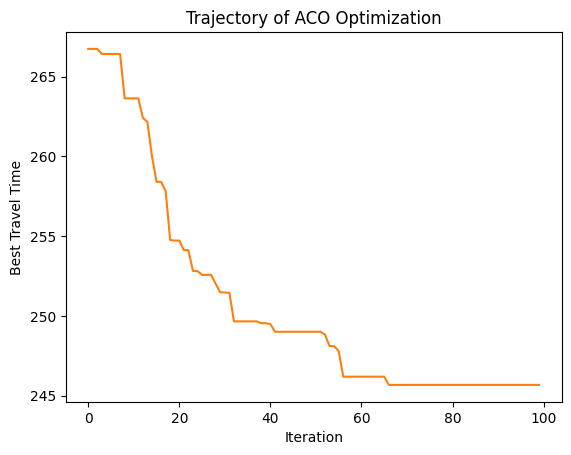

In [31]:
# Example usage:
num_ants = 10
num_iterations = 100
alpha = 1.0  # Influence of pheromone
beta = 2.0   # Influence of heuristic (distance)
evaporation_rate = 0.5  # Rate of pheromone evaporation

# Assuming distance_df and time_windows_df are already loaded
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Output the best route and travel time
print("Best route:", best_route)
print("Best travel time:", best_travel_time)

# Plot the travel time trajectory
plt.plot(best_travel_time)
plt.plot(best_times_history)
plt.xlabel("Iteration")
plt.ylabel("Best Travel Time")
plt.title("Trajectory of ACO Optimization")
plt.show()

Best route: [96, np.int64(60), np.int64(130), np.int64(82), np.int64(54), np.int64(196), np.int64(92), np.int64(205), np.int64(2), np.int64(36), np.int64(192), np.int64(151), np.int64(48), np.int64(148), np.int64(62), np.int64(116), np.int64(137), np.int64(64), np.int64(159), np.int64(170), np.int64(135), np.int64(53), np.int64(91), np.int64(182), np.int64(173), np.int64(202), np.int64(172), np.int64(52), np.int64(61), np.int64(191), np.int64(50), np.int64(127), np.int64(25), np.int64(73), np.int64(197), np.int64(21), np.int64(199), np.int64(40), np.int64(55), np.int64(99), np.int64(213), np.int64(194), np.int64(29), np.int64(231), np.int64(152), np.int64(17), np.int64(139), np.int64(109), np.int64(208), np.int64(81), np.int64(209), np.int64(80), np.int64(147), np.int64(86), np.int64(178), np.int64(77), np.int64(143), np.int64(7), np.int64(154), np.int64(4), np.int64(16), np.int64(106), np.int64(118), np.int64(168), np.int64(211), np.int64(6), np.int64(20), np.int64(71), np.int64(63), 

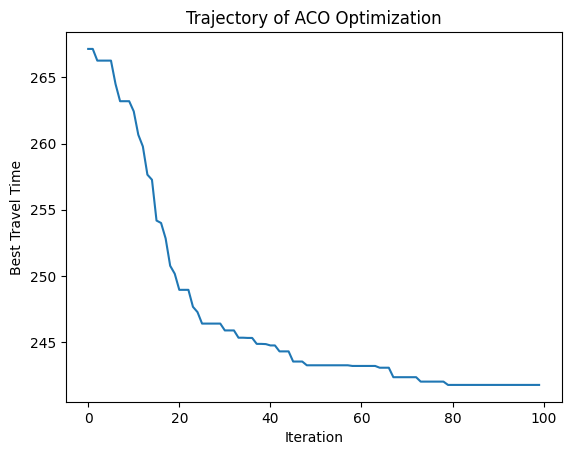

In [32]:
# Example usage:
num_ants = 20
num_iterations = 100
alpha = 1.0  # Influence of pheromone
beta = 2.0   # Influence of heuristic (distance)
evaporation_rate = 0.5  # Rate of pheromone evaporation

# Assuming distance_df and time_windows_df are already loaded
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Output the best route and travel time
print("Best route:", best_route)
print("Best travel time:", best_travel_time)

# Plot the travel time trajectory
plot_best_travel_times(best_times_history)

Best route: [138, np.int64(44), np.int64(167), np.int64(219), np.int64(25), np.int64(117), np.int64(64), np.int64(63), np.int64(162), np.int64(160), np.int64(13), np.int64(168), np.int64(114), np.int64(134), np.int64(40), np.int64(108), np.int64(211), np.int64(129), np.int64(125), np.int64(218), np.int64(50), np.int64(122), np.int64(224), np.int64(171), np.int64(51), np.int64(15), np.int64(186), np.int64(56), np.int64(26), np.int64(191), np.int64(195), np.int64(216), np.int64(139), np.int64(42), np.int64(39), np.int64(206), np.int64(69), np.int64(146), np.int64(92), np.int64(10), np.int64(54), np.int64(113), np.int64(110), np.int64(188), np.int64(58), np.int64(217), np.int64(49), np.int64(38), np.int64(81), np.int64(192), np.int64(153), np.int64(141), np.int64(96), np.int64(164), np.int64(85), np.int64(119), np.int64(16), np.int64(36), np.int64(11), np.int64(84), np.int64(8), np.int64(124), np.int64(121), np.int64(120), np.int64(66), np.int64(1), np.int64(19), np.int64(18), np.int64(19

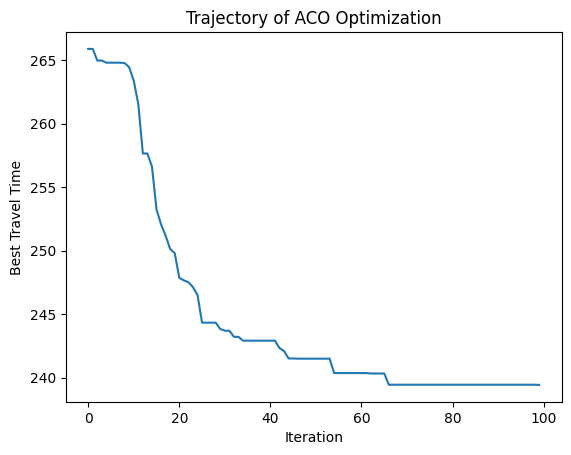

In [33]:
# Example usage:
num_ants = 30
num_iterations = 100
alpha = 1 # Influence of pheromone
beta = 2  # Influence of heuristic (distance)
evaporation_rate = 0.5  # Rate of pheromone evaporation

# Assuming distance_df and time_windows_df are already loaded
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Output the best route and travel time
print("Best route:", best_route)
print("Best travel time:", best_travel_time)

# Plot the travel time trajectory
plot_best_travel_times(best_times_history)

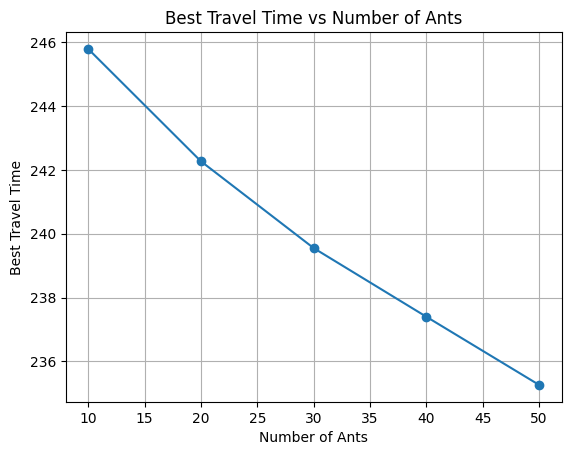

In [4]:
# Function to plot the best travel times for different number of ants
def plot_best_travel_times_vs_num_ants(ants_range, best_travel_times):
    plt.plot(ants_range, best_travel_times, marker='o')
    plt.xlabel("Number of Ants")
    plt.ylabel("Best Travel Time")
    plt.title("Best Travel Time vs Number of Ants")
    plt.grid(True)
    plt.show()

# Range of number of ants
ants_range = [10, 20, 30, 40, 50]

# List to store the best travel times for each number of ants
best_travel_times = []

# Iterate over different values of num_ants
for num_ants in ants_range:
    num_iterations = 100
    alpha = 1.0  # Influence of pheromone
    beta = 2.0   # Influence of heuristic (distance)
    evaporation_rate = 0.5  # Rate of pheromone evaporation

    # Assuming distance_df and time_windows_df are already loaded
    best_route, best_travel_time, best_routes_history, best_times_history = run_aco(
        num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df
    )
    
    # Store the best travel time for this number of ants
    best_travel_times.append(best_travel_time)

# Plot the best travel times versus number of ants
plot_best_travel_times_vs_num_ants(ants_range, best_travel_times)

une augmentation du nombre de fourmis tend généralement à améliorer la qualité des solutions trouvées. Cela s'explique par le fait qu'un plus grand nombre de fourmis permet une exploration plus exhaustive de l'espace de recherche, augmentant ainsi la probabilité de trouver une solution optimale ou proche de l'optimum. En d'autres termes, chaque fourmi explore une partie de l'espace de solution et, avec plus de fourmis, la diversité des solutions générées est plus grande, ce qui permet à l'algorithme de mieux éviter les minima locaux et de converger vers des solutions plus efficaces. Ainsi, en augmentant le nombre de fourmis, on observe généralement une amélioration des temps de parcours, ce qui reflète une meilleure performance de l'algorithme ACO 

 # 2.2 Qualité de la Solution: 

# Heuristique du Plus Proche Voisin avec Fenêtres de Temps

Cette méthode vise à résoudre le problème de voyageur de commerce (TSP) en tenant compte des contraintes des fenêtres de temps pour chaque ville.

**Étapes :**
1. On commence par une ville de départ (par défaut la première, index 0).
2. À chaque étape, on sélectionne la ville la plus proche parmi les non-visitées.
3. On calcule le temps de trajet vers cette ville.
4. Si l’arrivée se fait avant l’ouverture de la fenêtre de temps, on attend jusqu’au début de cette fenêtre.
5. On répète jusqu’à visiter toutes les villes.


# Borne Inférieure Greedy
Cette méthode calcule une borne inférieure pour le problème en utilisant une approche gloutonne qui prend également en compte les fenêtres de temps.

**Étapes :**
1. On part d’une ville de départ (par défaut la première).
2. À chaque étape, on choisit la ville non visitée ayant le temps de trajet minimal et respectant les contraintes de fenêtre de temps.
3. Si aucune ville n'est trouvée (violation de contraintes), une erreur est levée.
4. Une fois toutes les villes visitées, on retourne à la ville de départ pour compléter le circuit.

In [28]:
import pandas as pd

# Nearest Neighbor Heuristic to calculate the best time travel  la borne inférieure
def nearest_neighbor_time_heuristic(distance_df, time_windows_df, average_speed=60):
    """
    Solves the TSP problem using the Nearest Neighbor Heuristic considering time windows for best travel time.
    
    Args:
    - distance_df (pd.DataFrame): DataFrame containing the distance matrix.
    - time_windows_df (pd.DataFrame): DataFrame containing the time windows for each city.
    - average_speed (float): Average speed in km/h (default is 60 km/h).
    
    Returns:
    - total_time (float): Total travel time for the route considering travel and waiting times (in hours).
    - route (list): List of cities in the order they are visited.
    """
    num_cities = len(distance_df)
    unvisited = list(range(num_cities))
    route = [unvisited.pop(0)]  # Start with the first city (index 0)
    total_time = 0
    current_time = 0  # Track the current time after each city visit

    # While there are cities to visit
    while unvisited:
        current_city = route[-1]
        
        # Find the nearest neighbor (the city with the shortest distance)
        nearest_city = min(unvisited, key=lambda city: distance_df.iloc[current_city, city])
        route.append(nearest_city)
        
        # Distance between the current city and the nearest city
        distance = distance_df.iloc[current_city, nearest_city]
        
        # Convert the distance to travel time (in hours)
        travel_time = distance / average_speed  # Distance (km) / speed (km/h) = time (hours)

        # Calculate the arrival time at the next city
        arrival_time = current_time + travel_time

        # Get the time window for the next city
        start_time, end_time = time_windows_df.iloc[nearest_city]

        # If we arrive before the start time, we need to wait until the start time
        if arrival_time < start_time:
            wait_time = start_time - arrival_time
            current_time = start_time  # Wait until the start of the time window
            total_time += wait_time  # Add waiting time
        else:
            current_time = arrival_time  # No need to wait if within the time window

        total_time += travel_time  # Add travel time

        # Remove the city from the unvisited list
        unvisited.remove(nearest_city)

    return total_time, route



# Fonction pour calculer la borne inférieure (greedy)
def greedy_lower_bound(distance_df, time_windows_df):
    N = len(distance_df)
    visited = [False] * N
    current_city = 0
    total_travel_time = 0
    visited[current_city] = True
    arrival_time = 0
    average_speed = 60  # km/h
    travel_time_df = distance_df / average_speed

    for _ in range(N - 1):
        next_city = None
        min_travel_time = float('inf')

        # Find the next city to visit
        for city in range(N):
            if not visited[city]:
                travel_time = travel_time_df.iloc[current_city, city]
                tentative_arrival = arrival_time + travel_time

                # Check if the city satisfies time window constraints and has minimum travel time
                if (
                    tentative_arrival <= time_windows_df.iloc[city, 1] and
                    travel_time < min_travel_time
                ):
                    min_travel_time = travel_time
                    next_city = city

        if next_city is None:
            # Handle cases where no valid next city is found
            raise ValueError("No valid next city found. Check your distance or time window constraints.")

        visited[next_city] = True
        total_travel_time += min_travel_time
        arrival_time += min_travel_time
        current_city = next_city

    # Return to the starting city
    total_travel_time += travel_time_df.iloc[current_city, 0]
    return total_travel_time


# Analyse comparative :

**Solution ACO vs. Greedy :**
- Si le temps de trajet d'ACO est inférieur ou égal à la borne inférieure, cela indique que la solution obtenue est proche d’être optimale.
- Si le temps est supérieur, cela montre qu'il y a un écart potentiel à combler pour atteindre une solution plus proche de l’optimal.

**Solution ACO vs. Nearest neighbor:**
- Si le temps de trajet d'ACO est inférieur à la borne inférieure, cela prouve que l’algorithme ACO améliore significativement les solutions naïves.
- Si égal ou supérieur, cela suggère que l’algorithme n’a pas réussi à dépasser la solution de référence donnée par NNTH.

# Interprétation des sorties de console :
Les messages imprimés indiquent si l’algorithme ACO produit des solutions meilleures, équivalentes ou inférieures par rapport aux bornes théoriques.

Une bonne solution est celle où :
- ACO ≈ Borne inférieure

Cela confirme l'efficacité de l'algorithme pour résoudre le problème sous contraintes.


In [29]:
# Exemple d'utilisation
num_ants = 10
num_iterations = 100
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5

# Exécution de l'ACO
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Calcul des bornes
total_time, route = nearest_neighbor_time_heuristic(distance_df, time_windows_df)
lower_bound = greedy_lower_bound(distance_df, time_windows_df)

# l'ecart type 
std_dev = np.std(best_times_history)
# Affichage des résultats
print(f"L'écart-type des meilleurs temps de parcours est : {std_dev:.2f} heures")
print(f"Meilleur itinéraire trouvé par ACO : {best_route}")
print(f"Temps de trajet du meilleur itinéraire trouvé par ACO : {best_travel_time}")
print(f"Meilleur itinéraire trouvé par(NNTH) : {route}")
print(f"Borne inférieure (NNTH) : {total_time}")
print(f"Borne inférieure (Greedy Travel Time) : {lower_bound}")

# Comparaison de la solution ACO avec les bornes
if best_travel_time <= lower_bound:
    print("La solution ACO est égale ou meilleure que la borne inférieure(Greedy)")
else:
    print("La solution ACO est pire que la borne inférieure (Greedy)")

if best_travel_time >= total_time:
    print("La solution ACO est égale ou pire que la borne inférieure (NNTH)")
else:
    print("La solution ACO est meilleure que la borne inférieure(NNTH)")

L'écart-type des meilleurs temps de parcours est : 6.29 heures
Meilleur itinéraire trouvé par ACO : [112, np.int64(3), np.int64(120), np.int64(136), np.int64(77), np.int64(75), np.int64(137), np.int64(102), np.int64(60), np.int64(206), np.int64(215), np.int64(228), np.int64(98), np.int64(10), np.int64(80), np.int64(1), np.int64(176), np.int64(155), np.int64(24), np.int64(33), np.int64(56), np.int64(165), np.int64(149), np.int64(160), np.int64(135), np.int64(83), np.int64(189), np.int64(39), np.int64(99), np.int64(150), np.int64(87), np.int64(187), np.int64(103), np.int64(31), np.int64(109), np.int64(113), np.int64(23), np.int64(231), np.int64(49), np.int64(107), np.int64(48), np.int64(219), np.int64(142), np.int64(94), np.int64(8), np.int64(175), np.int64(221), np.int64(74), np.int64(34), np.int64(21), np.int64(224), np.int64(166), np.int64(128), np.int64(188), np.int64(58), np.int64(89), np.int64(140), np.int64(51), np.int64(55), np.int64(195), np.int64(210), np.int64(110), np.int64(7

Ce n'est pas mal, mais on peut surement faire mieux&nbsp;! Typiquement en augmontant le numbre de fourmis. D'ailleurs, voyons ce que ça donne&nbsp;:

In [40]:
# Exemple d'utilisation
num_ants = 30
num_iterations = 100
alpha = 1
beta = 2
evaporation_rate = 0.5

# Exécution de l'ACO
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Calcul des bornes
total_time, route = nearest_neighbor_time_heuristic(distance_df, time_windows_df)
lower_bound = greedy_lower_bound(distance_df, time_windows_df)

# l'ecart type 
std_dev = np.std(best_times_history)
# Affichage des résultats
print(f"L'écart-type des meilleurs temps de parcours est : {std_dev:.2f} heures")
print(f"Meilleur itinéraire trouvé par ACO : {best_route}")
print(f"Temps de trajet du meilleur itinéraire trouvé par ACO : {best_travel_time}")
print(f"Meilleur itinéraire trouvé par(NNTH) : {route}")
print(f"Borne inférieure (NNTH) : {total_time}")
print(f"Borne inférieure (Greedy Travel Time) : {lower_bound}")

# Comparaison de la solution ACO avec les bornes
if best_travel_time <= lower_bound:
    print("La solution ACO est égale ou meilleure que la borne inférieure(Greedy)")
else:
    print("La solution ACO est pire que la borne inférieure (Greedy)")

if best_travel_time >= total_time:
    print("La solution ACO est égale ou pire que la borne inférieure (NNTH)")
else:
    print("La solution ACO est meilleure que la borne inférieure(NNTH)")

L'écart-type des meilleurs temps de parcours est : 8.51 heures
Meilleur itinéraire trouvé par ACO : [40, np.int64(73), np.int64(67), np.int64(68), np.int64(93), np.int64(29), np.int64(225), np.int64(202), np.int64(172), np.int64(165), np.int64(229), np.int64(100), np.int64(140), np.int64(228), np.int64(189), np.int64(109), np.int64(65), np.int64(218), np.int64(214), np.int64(20), np.int64(117), np.int64(107), np.int64(211), np.int64(5), np.int64(15), np.int64(0), np.int64(199), np.int64(33), np.int64(145), np.int64(167), np.int64(57), np.int64(102), np.int64(122), np.int64(24), np.int64(61), np.int64(104), np.int64(183), np.int64(41), np.int64(75), np.int64(111), np.int64(98), np.int64(14), np.int64(1), np.int64(36), np.int64(88), np.int64(26), np.int64(79), np.int64(6), np.int64(80), np.int64(159), np.int64(210), np.int64(126), np.int64(170), np.int64(230), np.int64(19), np.int64(148), np.int64(162), np.int64(182), np.int64(144), np.int64(108), np.int64(55), np.int64(70), np.int64(56)

# Quality statistique solution: 
## Charger plusieurs instances
La fonction load_multiple_instances lit plusieurs fichiers et extrait les matrices de distance ainsi que les fenêtres temporelles associées.

In [21]:
import os

def load_multiple_instances(file_paths=None, random_instance_sizes=None):
    """
    Loads and parses multiple instances from a list of file paths.
    
    Args:
    - file_paths (list): List of file paths to be parsed.
    
    Returns:
    - instances (list): A list of tuples, where each tuple contains a distance matrix
                         and time windows DataFrame for each instance.
    """
    instances = []
    if file_paths:
        for file_path in file_paths:
            # Determine the file type based on the extension
            _, file_extension = os.path.splitext(file_path)
            
            if file_extension.lower() == '.tsp':
                # Parse TSPLIB files
                distance_df, time_windows_df = generate_distance_matrix(file_path)
            elif file_extension.lower() == '.tw':
                # Parse .tw files
                distance_df, time_windows_df = parse_instance(file_path)
            else:
                raise ValueError(f"Unsupported file format: {file_extension}")
            
            # Store the result as a tuple
            instances.append((distance_df, time_windows_df))
    if random_instance_sizes:
        for num_cities in random_instance_sizes:
            distance_df, time_windows_df = generate_random_instance(num_cities)
            instances.append((distance_df, time_windows_df))
    
    return instances

# Example usage
file_paths = [
    './AFG/rbg233.2.tw',  # Add the paths of your different files here
    './AFG/rbg152.tw',
    './AFG/rbg201a.tw',
    './uy734.tsp'
]
random_instance_sizes = [400, 600]

instances = load_multiple_instances(file_paths , random_instance_sizes=random_instance_sizes)

# Print out the loaded data for each instance
for i, (distance_df, time_windows_df) in enumerate(instances):
    print(f"Instance {i + 1}:")
    print("Distance Matrix:")
    print(distance_df)
    print("\nTime Windows:")
    print(time_windows_df)
    print("\n" + "-"*40)

Instance 1:
Distance Matrix:
     0    1    2    3    4    5    6    7    8    9    ...  222  223  224  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1     61    0   86   77   71   86   86   86   82   86  ...   77   86   86   
2     51   55    0   61   61   76   76   76   63   76  ...   67   76   76   
3     50   60   74    0   60   74   74   74   73   74  ...   65   74   74   
4     41   51   65   57    0   65   65   65   62   65  ...   56   65   65   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
227   36   48   63   52   50   63   63   63   57   63  ...   59   63   63   
228   48   73   48   72   72   48   48   48   72   48  ...   69   48   48   
229   52   75   64   75   75   64   64   64   75   64  ...   67   64   64   
230   63   74   89   75   75   89   89   89   75   89  ...   83   89   89   
231   50   73   64   73   73   64   64   64   73   64  ...   65   64   64   

     225  226  227  228  229  230  231  
0    

# Analyse sur plusieurs instances
La fonction run_aco_for_multiple_instances permet d'exécuter l'algorithme ACO sur plusieurs instances d'un problème de TSP avec fenêtres temporelles.

**Processus :**
- Parcourt chaque instance.
- Exécute l'algorithme ACO.
- Stocke les meilleurs itinéraires, temps de trajet, et historique des performances.

In [5]:
def run_aco_for_multiple_instances(instances, num_ants, num_iterations, alpha, beta, evaporation_rate):
    """
    Runs ACO for multiple instances and collects best travel times.
    
    Args:
    - instances (list): A list of tuples containing distance and time windows DataFrames.
    - num_ants (int): Number of ants to use.
    - num_iterations (int): Number of iterations for the ACO algorithm.
    - alpha (float): Influence of pheromone on decision making.
    - beta (float): Influence of heuristic (inverse of distance) on decision making.
    - evaporation_rate (float): Rate of pheromone evaporation.

    Returns:
    - results (list): A list of dictionaries with best route and travel time for each instance.
    """
    results = []
    for i, (distance_df, time_windows_df) in enumerate(instances):
        print(f"Running ACO for Instance {i + 1}...")
        
        # Run the ACO algorithm for the current instance
        best_route, best_travel_time, best_routes_history, best_times_history = run_aco(
            num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)
        
        # Store the results for this instance
        results.append({
            'instance': i + 1,
            'best_route': best_route,
            'best_travel_time': best_travel_time,
            'best_routes_history': best_routes_history,
            'best_times_history': best_times_history
        })
    
    return results

# Function to plot best travel times vs number of cities
def plot_best_travel_time_vs_num_cities(instances, results):
    num_cities = []  # List to store the number of cities in each instance
    best_travel_times = []  # List to store the best travel times

    for i, (distance_df, time_windows_df) in enumerate(instances):
        num_cities.append(len(distance_df))  # Number of cities is the size of the distance matrix
        best_travel_times.append(results[i]['best_travel_time'])

    # Plotting the relationship between number of cities and best travel time
    plt.plot(num_cities, best_travel_times, marker='o')
    plt.xlabel("Number of Cities")
    plt.ylabel("Best Travel Time (hours)")
    plt.title("Impact of Number of Cities on Best Travel Time")
    plt.grid(True)
    plt.show()

# Test Avec plusieurs instances: (5 fichiers)

Running ACO for Instance 1...
Running ACO for Instance 2...
Running ACO for Instance 3...
Running ACO for Instance 4...
Running ACO for Instance 5...
Instance 1 Best Travel Time: 246.85 hours
Best Route: [120, np.int64(213), np.int64(112), np.int64(3), np.int64(32), np.int64(184), np.int64(156), np.int64(172), np.int64(50), np.int64(210), np.int64(159), np.int64(126), np.int64(35), np.int64(134), np.int64(117), np.int64(208), np.int64(110), np.int64(221), np.int64(225), np.int64(93), np.int64(89), np.int64(69), np.int64(97), np.int64(66), np.int64(80), np.int64(149), np.int64(92), np.int64(205), np.int64(119), np.int64(212), np.int64(151), np.int64(62), np.int64(60), np.int64(124), np.int64(45), np.int64(180), np.int64(196), np.int64(28), np.int64(158), np.int64(164), np.int64(122), np.int64(202), np.int64(17), np.int64(183), np.int64(8), np.int64(106), np.int64(20), np.int64(139), np.int64(209), np.int64(18), np.int64(57), np.int64(83), np.int64(201), np.int64(76), np.int64(56), np.in

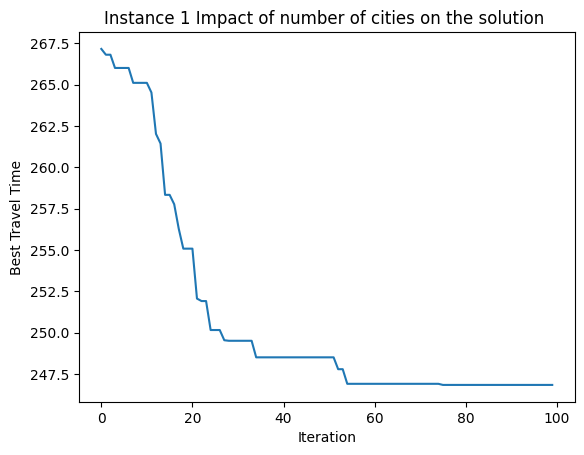


----------------------------------------
Instance 2 Best Travel Time: 182.08 hours
Best Route: [167, np.int64(76), np.int64(108), np.int64(4), np.int64(85), np.int64(171), np.int64(55), np.int64(144), np.int64(60), np.int64(59), np.int64(54), np.int64(111), np.int64(86), np.int64(13), np.int64(123), np.int64(104), np.int64(11), np.int64(154), np.int64(1), np.int64(126), np.int64(147), np.int64(170), np.int64(130), np.int64(112), np.int64(7), np.int64(9), np.int64(43), np.int64(19), np.int64(122), np.int64(95), np.int64(31), np.int64(40), np.int64(121), np.int64(152), np.int64(161), np.int64(90), np.int64(143), np.int64(146), np.int64(97), np.int64(166), np.int64(81), np.int64(157), np.int64(47), np.int64(39), np.int64(115), np.int64(66), np.int64(83), np.int64(82), np.int64(37), np.int64(72), np.int64(106), np.int64(105), np.int64(134), np.int64(109), np.int64(73), np.int64(162), np.int64(127), np.int64(3), np.int64(117), np.int64(140), np.int64(34), np.int64(0), np.int64(75), np.int6

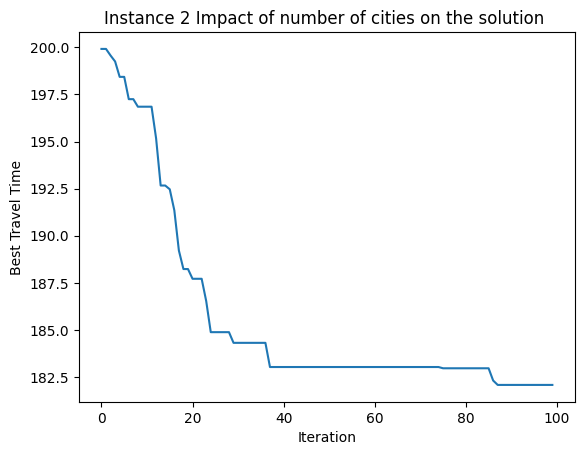


----------------------------------------
Instance 3 Best Travel Time: 162.77 hours
Best Route: [85, np.int64(41), np.int64(57), np.int64(103), np.int64(35), np.int64(69), np.int64(6), np.int64(70), np.int64(31), np.int64(120), np.int64(140), np.int64(106), np.int64(68), np.int64(107), np.int64(111), np.int64(118), np.int64(65), np.int64(8), np.int64(96), np.int64(0), np.int64(142), np.int64(52), np.int64(150), np.int64(73), np.int64(79), np.int64(40), np.int64(54), np.int64(26), np.int64(53), np.int64(30), np.int64(60), np.int64(46), np.int64(36), np.int64(2), np.int64(1), np.int64(94), np.int64(101), np.int64(77), np.int64(116), np.int64(141), np.int64(135), np.int64(83), np.int64(139), np.int64(5), np.int64(37), np.int64(130), np.int64(72), np.int64(134), np.int64(123), np.int64(84), np.int64(105), np.int64(9), np.int64(23), np.int64(64), np.int64(25), np.int64(34), np.int64(92), np.int64(91), np.int64(114), np.int64(113), np.int64(59), np.int64(56), np.int64(124), np.int64(149), np

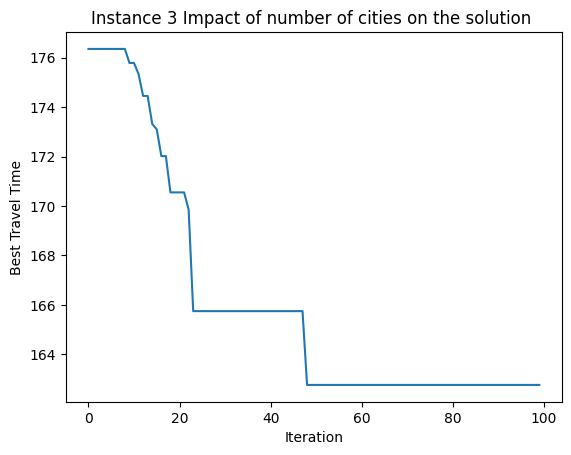


----------------------------------------
Instance 4 Best Travel Time: 246.33 hours
Best Route: [162, np.int64(158), np.int64(15), np.int64(100), np.int64(185), np.int64(144), np.int64(175), np.int64(67), np.int64(65), np.int64(117), np.int64(60), np.int64(135), np.int64(77), np.int64(43), np.int64(16), np.int64(36), np.int64(209), np.int64(32), np.int64(45), np.int64(153), np.int64(21), np.int64(128), np.int64(49), np.int64(25), np.int64(183), np.int64(8), np.int64(198), np.int64(106), np.int64(86), np.int64(61), np.int64(191), np.int64(151), np.int64(161), np.int64(79), np.int64(34), np.int64(94), np.int64(227), np.int64(170), np.int64(155), np.int64(193), np.int64(116), np.int64(121), np.int64(58), np.int64(108), np.int64(177), np.int64(187), np.int64(103), np.int64(123), np.int64(26), np.int64(53), np.int64(87), np.int64(22), np.int64(12), np.int64(127), np.int64(52), np.int64(211), np.int64(111), np.int64(174), np.int64(30), np.int64(82), np.int64(214), np.int64(223), np.int64(216

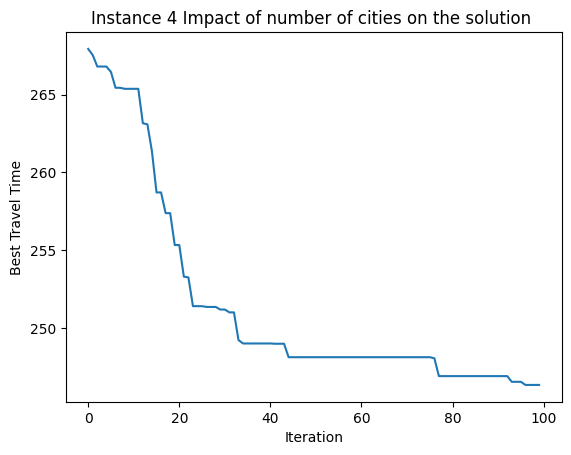


----------------------------------------
Instance 5 Best Travel Time: 213.18 hours
Best Route: [56, np.int64(196), np.int64(167), np.int64(84), np.int64(109), np.int64(73), np.int64(162), np.int64(31), np.int64(194), np.int64(1), np.int64(94), np.int64(70), np.int64(201), np.int64(193), np.int64(108), np.int64(81), np.int64(33), np.int64(99), np.int64(25), np.int64(184), np.int64(68), np.int64(0), np.int64(4), np.int64(130), np.int64(34), np.int64(91), np.int64(122), np.int64(178), np.int64(51), np.int64(48), np.int64(170), np.int64(189), np.int64(145), np.int64(61), np.int64(151), np.int64(69), np.int64(175), np.int64(157), np.int64(9), np.int64(125), np.int64(98), np.int64(14), np.int64(79), np.int64(87), np.int64(80), np.int64(147), np.int64(42), np.int64(137), np.int64(55), np.int64(131), np.int64(115), np.int64(15), np.int64(59), np.int64(144), np.int64(29), np.int64(93), np.int64(90), np.int64(133), np.int64(164), np.int64(32), np.int64(30), np.int64(154), np.int64(97), np.int64

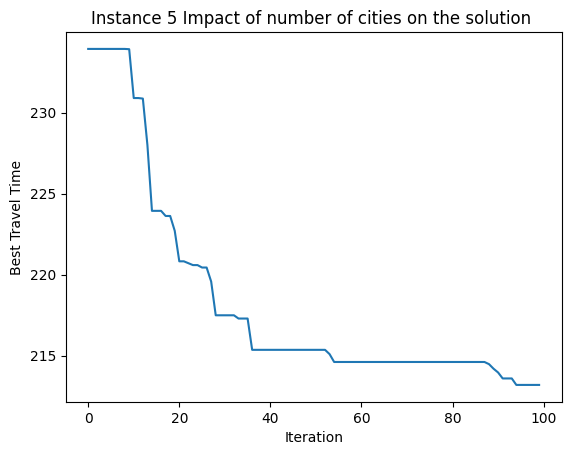


----------------------------------------


In [35]:
results = run_aco_for_multiple_instances(instances, num_ants=10, num_iterations=100, alpha=1, beta=2, evaporation_rate=0.5)

# Print the results
for result in results:
    print(f"Instance {result['instance']} Best Travel Time: {result['best_travel_time']:.2f} hours")
    print(f"Best Route: {result['best_route']}")
    plt.plot(result['best_times_history'])  # Plot the optimization trajectory
    plt.xlabel("Iteration")
    plt.ylabel("Best Travel Time")
    plt.title(f"Instance {result['instance']} Impact of number of cities on the solution ")
    plt.show()
    print("\n" + "-"*40)

Running ACO for Instance 1...
Running ACO for Instance 2...
Running ACO for Instance 3...
Running ACO for Instance 4...
Running ACO for Instance 5...
Running ACO for Instance 6...


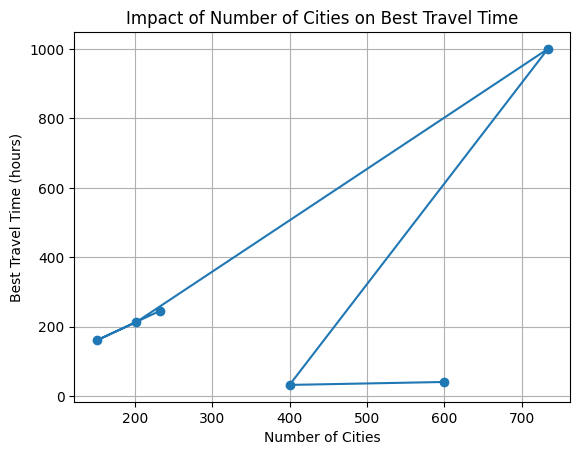

In [22]:
results = run_aco_for_multiple_instances(instances, num_ants=10, num_iterations=100, alpha=1, beta=2, evaporation_rate=0.5)

# Plot the best travel times vs number of cities
plot_best_travel_time_vs_num_cities(instances, results)

# Impact des Paramètres Alpha (𝛼) et Beta (𝛽) 
**Rôle de 𝛼 (Influence des Phéromones) :**
1. 𝛼 élevé (exemple: 𝛼 = 5) :
- Favorise les chemins riches en phéromones.
- Peut conduire à une convergence rapide, car les fourmis exploitent intensément les solutions déjà explorées.
- Risque : Cela peut entraîner un piégeage prématuré dans des solutions sous-optimales (minima locaux).

2. 𝛼 faible :
- Encourage une exploration plus large, les phéromones ayant un impact moindre.
- Peut ralentir la convergence mais augmente la diversité des solutions.


**Rôle de 𝛽 (Influence de l'Heuristique)**
1. 𝛽 élevé (exemple:  𝛽 = 10) :
- Les fourmis sont fortement influencées par l’heuristique, favorisant les trajets avec un coût temporel minimal.
- Permet une exploration rapide de bonnes solutions, mais peut négliger les chemins potentiellement intéressants avec peu de phéromones.

2. 𝛽 faible :
- Diminue l'importance du coût heuristique, favorisant davantage les phéromones.
- Permet une meilleure exploitation des routes historiquement attractives, mais peut négliger les routes optimales sur le plan heuristique.

# Tester avec Plusieurs valeurs de Alpha:

Iteration 1, Best Travel Time: 268.4166666666668
Iteration 2, Best Travel Time: 268.4166666666668
Iteration 3, Best Travel Time: 268.4166666666668
Iteration 4, Best Travel Time: 268.4166666666668
Iteration 5, Best Travel Time: 268.4166666666668
Iteration 6, Best Travel Time: 268.4166666666668
Iteration 7, Best Travel Time: 267.18333333333334
Iteration 8, Best Travel Time: 267.18333333333334
Iteration 9, Best Travel Time: 267.18333333333334
Iteration 10, Best Travel Time: 267.18333333333334
Iteration 11, Best Travel Time: 267.18333333333334
Iteration 12, Best Travel Time: 267.18333333333334
Iteration 13, Best Travel Time: 267.18333333333334
Iteration 14, Best Travel Time: 267.18333333333334
Iteration 15, Best Travel Time: 267.18333333333334
Iteration 16, Best Travel Time: 267.18333333333334
Iteration 17, Best Travel Time: 267.18333333333334
Iteration 18, Best Travel Time: 265.45000000000005
Iteration 19, Best Travel Time: 265.45000000000005
Iteration 20, Best Travel Time: 265.4500000000

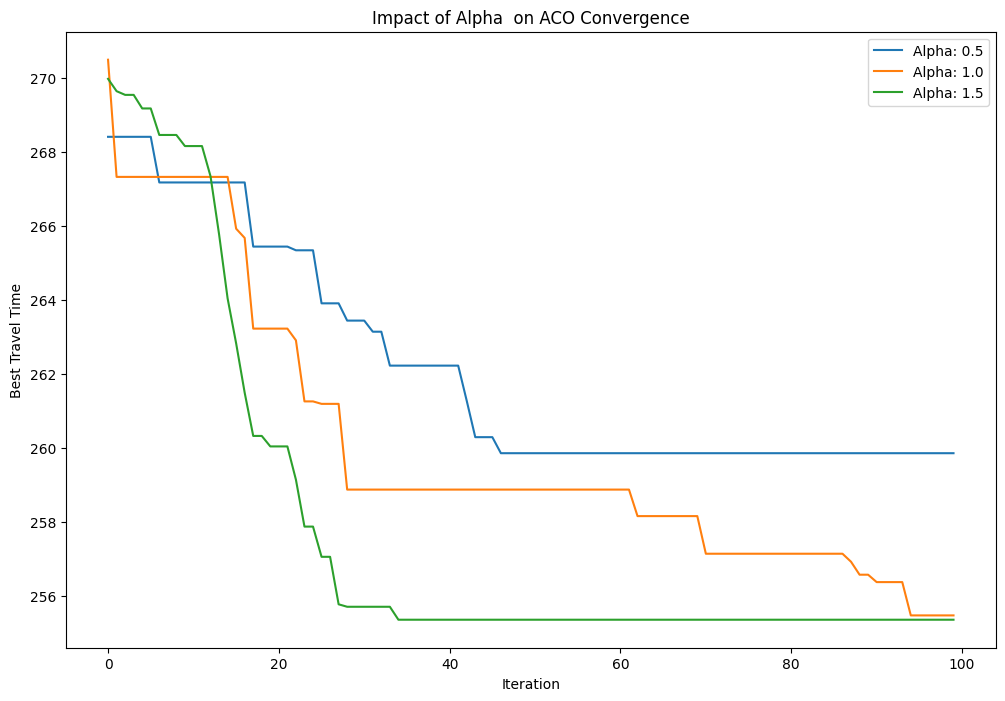

In [20]:

num_ants = 10
num_iterations = 100
evaporation_rate = 0.5
alpha_values = [0.5, 1.0, 1.5]
beta_values = 2.0

plt.figure(figsize=(12, 8))

for alpha in alpha_values:
     _, _, _, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)
     plt.plot(best_times_history, label=f'Alpha: {alpha}')

plt.title("Impact of Alpha  on ACO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Travel Time")
plt.legend()
plt.show()

alpha contrôle l'influence de l'intensité des phéromones sur la probabilité de sélection de la prochaine ville dans le parcours. Une valeur élevée de alpha renforce l'influence des phéromones, ce qui rend les fourmis plus susceptibles de sélectionner des chemins avec des traces de phéromone plus fortes. Cela conduit à une convergence plus rapide vers des solutions jugées bonnes par les traces de phéromone, mais cela peut aussi entraîner un blocage dans des optima locaux si l'exploration est insuffisante. À l'inverse, une valeur plus faible de alpha réduit l'influence des phéromones, permettant aux fourmis d'explorer l'espace de recherche de manière plus uniforme. Cela peut améliorer la capacité de l'algorithme à échapper aux optima locaux, mais ralentir la convergence, car l'algorithme peut errer plus longtemps sur des chemins sous-optimaux avant de trouver de meilleures solutions.

# Tester avec plusieurs valeurs de Beta

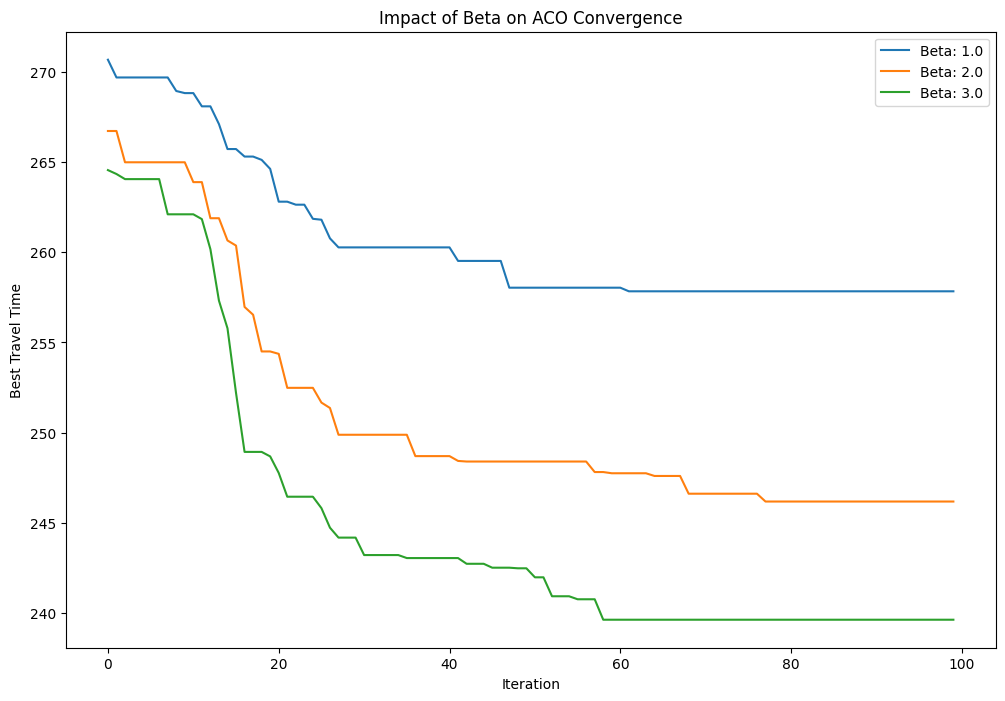

In [38]:

num_ants = 10
num_iterations = 100
evaporation_rate = 0.5
alpha_values = 1.0
beta_values = [1.0, 2.0, 3.0]

plt.figure(figsize=(12, 8))
for beta in beta_values:
     _, _, _, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)
     plt.plot(best_times_history, label=f'Beta: {beta}')

plt.title("Impact of Beta on ACO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Travel Time")
plt.legend()
plt.show()

Beta contrôle l'influence relative des traces de phéromone par rapport à la distance entre les villes lors du choix de la prochaine ville à visiter. Une valeur élevée de beta accorde plus d'importance aux traces de phéromone, incitant ainsi les fourmis à suivre les chemins déjà explorés. Cela peut accélérer la convergence, car l'algorithme se concentre davantage sur l'exploitation des solutions précédemment trouvées. Cependant, si beta est trop élevé, l'algorithme peut converger prématurément vers une solution sous-optimale, en restant bloqué dans un optimum local. En revanche, une valeur plus faible de beta réduit l'impact des traces de phéromone, ce qui pousse l'algorithme à explorer de nouveaux chemins plus librement. Cette exploration permet d'éviter les minima locaux et d'améliorer la diversité des solutions, mais peut ralentir la convergence, car l'algorithme peut prendre plus de temps pour trouver une solution optimale.

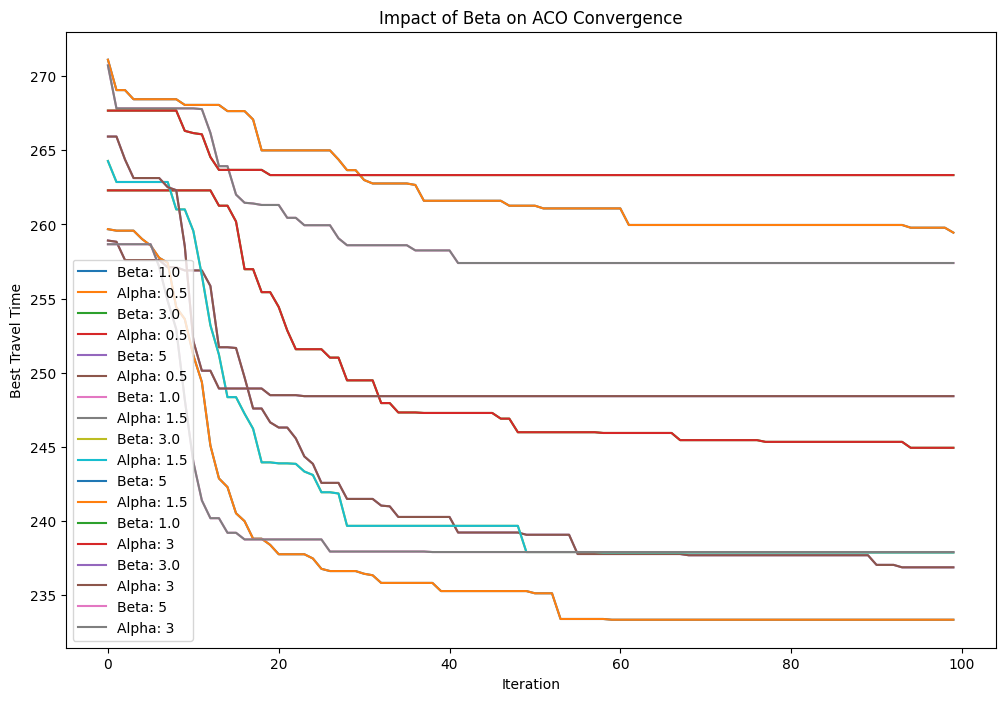

In [30]:
num_ants = 10
num_iterations = 100
evaporation_rate = 0.5
alpha_values = [0.5,  1.5  ,3]
beta_values = [1.0,  3.0  ,5]

plt.figure(figsize=(12, 8))
for alpha in alpha_values:
     for beta in beta_values:
           _, _, _, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)
           plt.plot(best_times_history, label=f'Beta: {beta}')
           plt.plot(best_times_history, label=f'Alpha: {alpha}')

plt.title("Impact of Beta on ACO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Travel Time")
plt.legend()
plt.show()

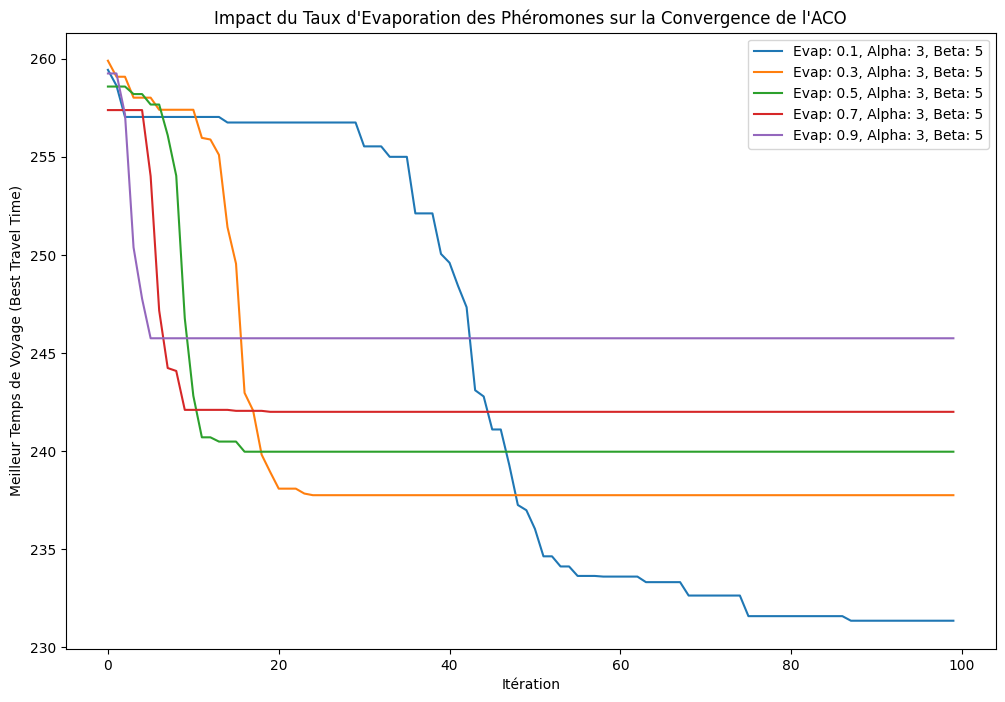

In [31]:
import matplotlib.pyplot as plt

# Paramètres
num_ants = 10
num_iterations = 100
evaporation_rates = [0.1, 0.3, 0.5, 0.7, 0.9]  # Différents taux d'évaporation
alpha_values = 1
beta_values = 2

plt.figure(figsize=(12, 8))

# Tracer les courbes pour chaque combinaison d'alpha, beta et taux d'évaporation
for evaporation_rate in evaporation_rates:
            # Exécuter l'ACO avec les paramètres donnés
            _, _, _, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)
            
            # Tracer le meilleur temps de voyage pour cette combinaison
            plt.plot(best_times_history, label=f'Evap: {evaporation_rate}, Alpha: {alpha}, Beta: {beta}')

# Ajouter les titres et les labels
plt.title("Impact du Taux d'Evaporation des Phéromones sur la Convergence de l'ACO")
plt.xlabel("Itération")
plt.ylabel("Meilleur Temps de Voyage (Best Travel Time)")
plt.legend()
plt.show()


L'impact du taux d'évaporation dans l'algorithme de colonie de fourmis (ACO) joue un rôle crucial dans l'efficacité de la recherche de solutions. Si ce taux est trop élevé, les phéromones se dissipent rapidement, empêchant ainsi l'algorithme d'explorer efficacement les différentes solutions possibles. En conséquence, l'ACO peut passer à côté de solutions prometteuses. À l'inverse, un taux d'évaporation trop faible ralentit le processus d'exploration en maintenant des traces de phéromones sur des solutions moins optimales, ce qui empêche l'algorithme de se débarrasser des mauvaises solutions. L'interaction entre les paramètres alpha (qui détermine l'importance des phéromones) et beta (qui représente l'importance de la distance entre les solutions) influence également la manière dont l'algorithme réagit à l'évaporation. Selon les valeurs choisies pour ces paramètres, l'ACO peut converger plus rapidement vers une solution optimale. Certaines combinaisons spécifiques de ces paramètres permettent à l'algorithme d'adapter son comportement pour une exploration plus efficace, facilitant ainsi une convergence plus rapide vers une meilleure solution.

Best route found by ACO: [11, np.int64(166), np.int64(13), np.int64(17), np.int64(117), np.int64(155), np.int64(72), np.int64(88), np.int64(5), np.int64(195), np.int64(216), np.int64(176), np.int64(83), np.int64(32), np.int64(76), np.int64(44), np.int64(18), np.int64(7), np.int64(161), np.int64(159), np.int64(126), np.int64(227), np.int64(63), np.int64(162), np.int64(182), np.int64(210), np.int64(93), np.int64(29), np.int64(206), np.int64(81), np.int64(148), np.int64(173), np.int64(134), np.int64(163), np.int64(114), np.int64(150), np.int64(91), np.int64(16), np.int64(67), np.int64(146), np.int64(131), np.int64(69), np.int64(65), np.int64(9), np.int64(107), np.int64(105), np.int64(231), np.int64(212), np.int64(177), np.int64(96), np.int64(47), np.int64(46), np.int64(86), np.int64(15), np.int64(108), np.int64(55), np.int64(53), np.int64(225), np.int64(129), np.int64(64), np.int64(170), np.int64(12), np.int64(127), np.int64(51), np.int64(52), np.int64(174), np.int64(118), np.int64(3), np

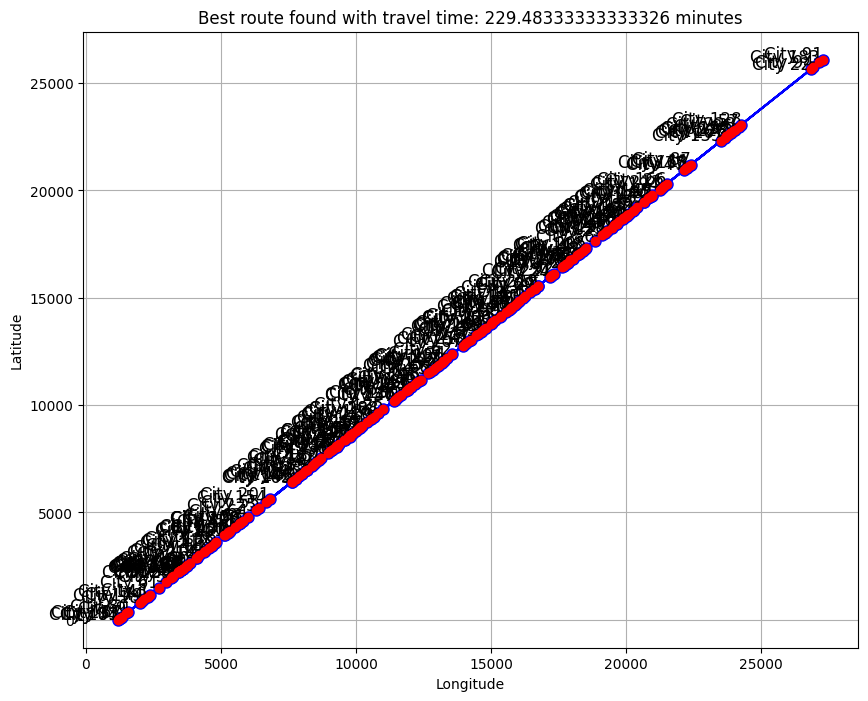

In [38]:

# Example of ACO parameters
num_ants = 10
num_iterations = 100
alpha = 3
beta = 5
evaporation_rate = 0.1

# Execute ACO (this assumes you have defined the run_aco function and it returns the best route)
best_route, best_travel_time, best_routes_history, best_times_history = run_aco(num_ants, num_iterations, alpha, beta, evaporation_rate, distance_df, time_windows_df)

# Print the best route and travel time found by ACO
print(f"Best route found by ACO: {best_route}")
print(f"Travel time of the best route found by ACO: {best_travel_time} minutes")

# Extract coordinates of the cities in the order of the best route
# Check if best_route contains valid indices
valid_route = [i for i in best_route if i < len(coords)]  # Filter out invalid indices

# Extract coordinates of the cities in the order of the best route
best_route_coords = [coords[i] for i in valid_route]  # Now, using only valid indices
lats, lons = zip(*best_route_coords)

# Plotting the route
plt.figure(figsize=(10, 8))
plt.plot(lons, lats, marker='o', color='b', linestyle='-', markersize=8, label="Best route")
plt.scatter(lons, lats, color='red', zorder=5)

# Annotate cities along the route
for i, coord in enumerate(best_route_coords):
    plt.text(lons[i], lats[i], f'City {i+1}', fontsize=12, ha='right')

# Add title and labels
plt.title(f"Best route found with travel time: {best_travel_time} minutes")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.grid(True)
plt.show()



## CONCLUSION

En partant du problème du voyageur de commerce dans un scénario immersif, en passant par l’analyse de sa NP-complétude et sa modélisation mathématique prenant en compte les contraintes et notre objectif de minimisation, cette étude constitue son aboutissement. 

Nous avons choisi d'utiliser les tataheuristiques, notamment la méthode des colonies de fourmis, pour explorer l'espace des solutions et s'approcher le plus possible d'une solution optimale.

Toute étude gagne en valeur avec des comparaisons. Ainsi, nous avons choisi de confronter notre approche à une autre méthode, cells heuristiques.ou. 

Enfin, des graphiques viennent enrichir notre analyse en permettant d'étudier et de comparer les performances des deux méthodes, afin de mettre en évidence les raisons pour lesquelles notre choix initial s'avère plus pertinent. 

Cette étude, associée à nos travaux précédents, introduit des concepts clés dans le domaine de la complexité algorithmique et de la modélisation.